# Single-node training example

In [1]:
import sys
sys.path.append('..')

In [2]:
# Externals
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Locals
from data import get_datasets
from models import get_model
from utils.device import configure_session
from utils.optimizers import get_optimizer
from utils.callbacks import TimingCallback

Using TensorFlow backend.


In [3]:
%matplotlib inline

## Introduction

Image classification on CIFAR10.
Show some example images here.

In [4]:
x, y = cifar10.load_data()[0]

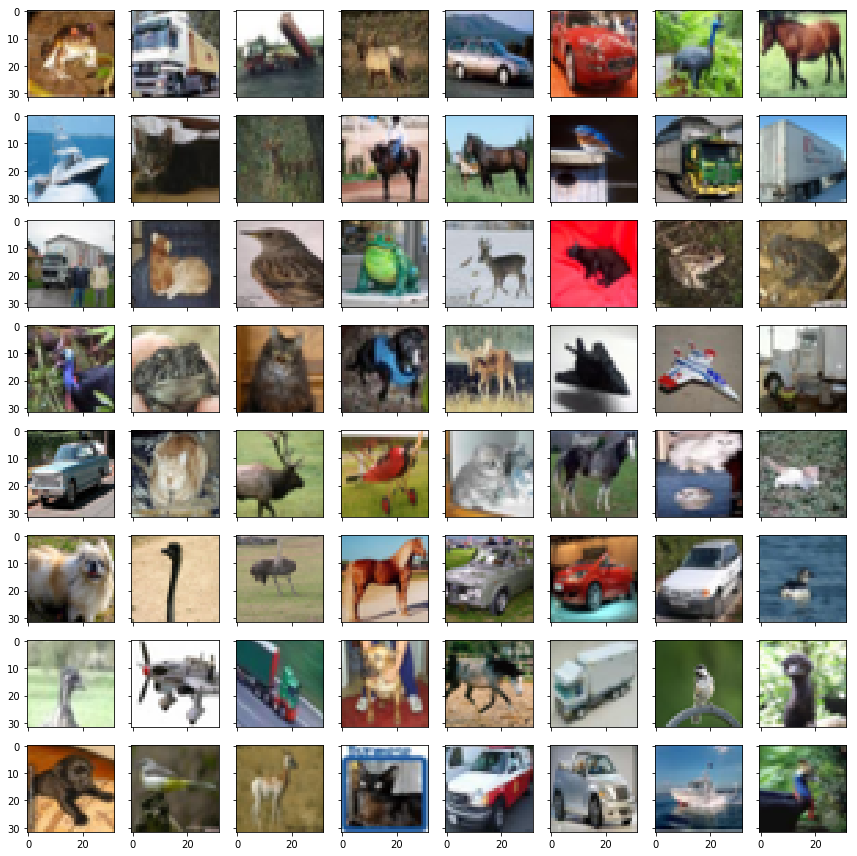

In [5]:
nrows = 8
ncols = 8

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x[i])
    
plt.tight_layout()

## Configuration

In [6]:
# Model config
model_name = 'cnn'
input_shape = [32, 32, 3]
n_classes = 10
dropout = 0.1

# Optimizer config
optimizer_name = 'Adam'
lr = 0.001

# Training config
batch_size = 32
n_epochs = 32
loss_name = 'categorical_crossentropy'
metrics = ['accuracy']

In [7]:
# Hardware config
gpu = None
intra_threads = 2
inter_threads = 2

In [8]:
configure_session(gpu=gpu, intra_threads=intra_threads, inter_threads=inter_threads)

## Load the data

In [9]:
# Load the data
train_gen, valid_gen = get_datasets(name='cifar10', batch_size=batch_size)

## Build the model

In [10]:
# Build the model and optimizer
model = get_model(name=model_name, input_shape=input_shape, n_classes=n_classes, dropout=dropout)
opt = get_optimizer(name=optimizer_name, lr=lr)
model.compile(loss=loss_name, optimizer=opt, metrics=metrics)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

## Train the model

In [11]:
# Train the model
history = model.fit_generator(train_gen,
                              epochs=n_epochs,
                              steps_per_epoch=len(train_gen),
                              validation_data=valid_gen,
                              validation_steps=len(valid_gen))

Epoch 1/32
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5547 - acc: 0.4388 - val_loss: 1.2141 - val_acc: 0.5685
Epoch 2/32
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2253 - acc: 0.5633 - val_loss: 1.1046 - val_acc: 0.6057
Epoch 3/32
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0895 - acc: 0.6144 - val_loss: 0.9583 - val_acc: 0.6657
Epoch 4/32
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0146 - acc: 0.6418 - val_loss: 0.9149 - val_acc: 0.6849
Epoch 5/32
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9600 - acc: 0.6611 - val_loss: 0.8699 - val_acc: 0.6909
Epoch 6/32
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9138 - acc: 0.6771 - val_loss: 0.8520 - val_acc: 0.7033
Epoch 7/32
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8834 - acc: 0.6897 - val_loss: 0.7907 - val_acc: 0.7279
Epoch 8/32
1563/1563 [==========================

## Visualize training history

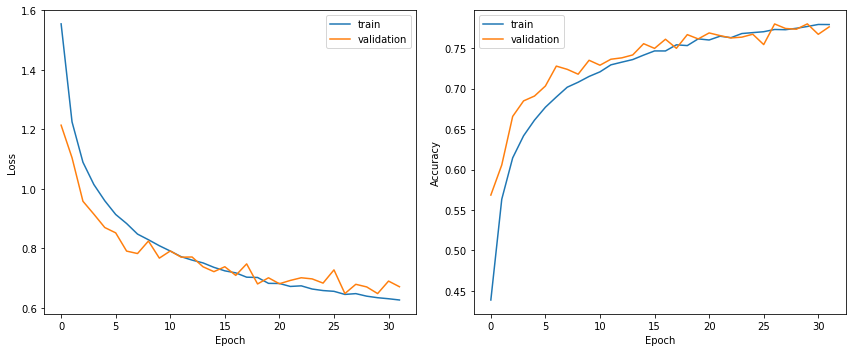

In [12]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the loss
ax0.plot(history.epoch, history.history['loss'], label='train')
ax0.plot(history.epoch, history.history['val_loss'], label='validation')
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax0.legend(loc=0)

# Plot the accuracy
ax1.plot(history.epoch, history.history['acc'], label='train')
ax1.plot(history.epoch, history.history['val_acc'], label='validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc=0)


plt.tight_layout()